# Titanic Project

In [1]:
#IMPORT THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import sklearn
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('titanic_train.csv')  # CREATE A DATAFRAME FROM THE GIVEN CSV

In [3]:
df.head()  # LETS SEE THE FIRST 5 ROWS OF DATA

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape  # Lets check the shape of data

(891, 12)

In [5]:
df.info()   # Lets check the type of features and target

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df['Survived'].value_counts()   # Lets check the balance of data

0    549
1    342
Name: Survived, dtype: int64

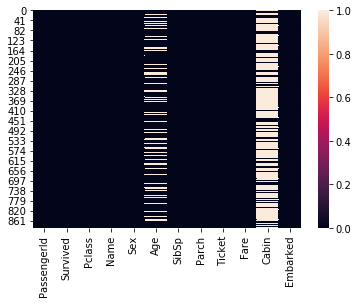

In [7]:
sns.heatmap(df.isnull()) # # Lets check the missing values

In [8]:
df.isnull().sum() # Lets check the missing values again to confirm

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Let us explore age variable 

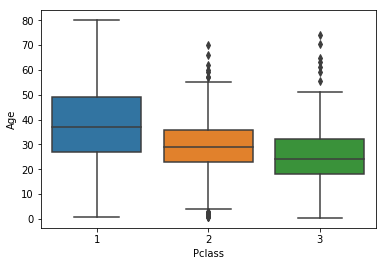

In [10]:
sns.boxplot(x=df['Pclass'],y=df['Age'])  # we can see age has different values in different classes

In [11]:
g= df.groupby('Pclass')

In [12]:
g.Age.median()  # Lets find what is median age as per class

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [13]:
 # impute the missing values
def impute_age(cols): 
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age
    
        
    
 

In [14]:
df['Age'] = df[['Age','Pclass']].apply(impute_age,axis=1)

In [15]:
#Lets check missing values again
df['Age'].isnull().sum()

0

In [16]:
# Lets see missing values in embarked variable
df['Embarked'].isnull().sum()

2

In [17]:
#As it categorical variable , replace missing values by mode of data
mode = df['Embarked'].mode()


In [18]:
mode

0    S
dtype: object

In [19]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [20]:
df.iloc[61]

PassengerId                     62
Survived                         1
Pclass                           1
Name           Icard, Miss. Amelie
Sex                         female
Age                             38
SibSp                            0
Parch                            0
Ticket                      113572
Fare                            80
Cabin                          B28
Embarked                         S
Name: 61, dtype: object

In [21]:
#Lets confirm about missing values in Embarked variable

In [22]:
df['Embarked'].isnull().sum()

0

In [23]:
# Lets us drop cabin as it has too many missing values and other which have unique values per passenger
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1, inplace= True)

In [24]:
df.head() # Lets check first five rows after dropping the above variables

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


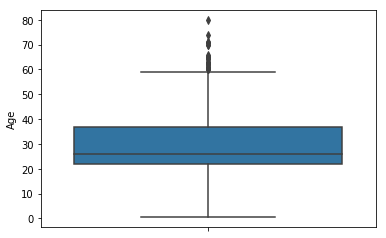

In [25]:
# Lets check for outliers in age variable
sns.boxplot(df['Age'],orient='vertical')

In [26]:
#Lets remove the outliers
Q3 =df['Age'].quantile(0.75)
Q1= df['Age'].quantile(0.25)
IQR = Q3-Q1
IQR

15.0

In [27]:
UPPER_BOUND = Q3 + 1.5*IQR
UPPER_BOUND

59.5

In [28]:
LOWER_BOUND = Q1 - 1.5*IQR
LOWER_BOUND

-0.5

In [29]:
dfnew =df[df['Age']<UPPER_BOUND]

In [30]:
df.shape

(891, 8)

In [31]:
dfnew.shape

(865, 8)

In [32]:
# Lets remove outliers of Fare variable
Q3F =df['Fare'].quantile(0.75)
Q1F = df['Fare'].quantile(0.25)
IQRf = Q3F-Q1F 
IQRf

23.0896

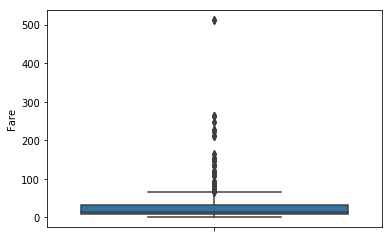

In [33]:
sns.boxplot(df['Fare'],orient='vertical')

In [34]:
UPPER_BOUNDN = Q3F + 1.5*IQRf
UPPER_BOUNDN

65.6344

In [35]:
LOWER_BOUNDN = Q1F - 1.5*IQRf
LOWER_BOUNDN

-26.724

In [36]:
dfupdated =  dfnew[dfnew['Fare']<UPPER_BOUNDN]                        #dfnew[(dfnew['Fare']>LOWER_BOUNDN) |(dfnew['Fare']<UPPER_BOUNDN) ]

In [37]:
dfupdated.shape

(755, 8)

In [38]:
dfupdated.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,24.0,0,0,8.4583,Q


In [39]:
# Lets check for skewness
dfupdated.skew()

Survived    0.656361
Pclass     -1.082343
Age         0.158468
SibSp       2.749912
Parch       3.110434
Fare        1.458550
dtype: float64

In [40]:
# out of the numerical features only fare has unacceptable skewness less overcome it
dfupdated['Fare']= np.log1p(dfupdated['Fare'])

In [41]:
#Lets check skewness again, we can now fare is in acceptable range
dfupdated.skew()

Survived    0.656361
Pclass     -1.082343
Age         0.158468
SibSp       2.749912
Parch       3.110434
Fare       -0.523388
dtype: float64

In [42]:
#Lets check the shape again
dfupdated.shape

(755, 8)

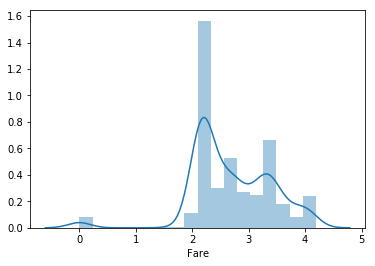

In [43]:
#Lets check the distribution of fare
sns.distplot(dfupdated['Fare'])

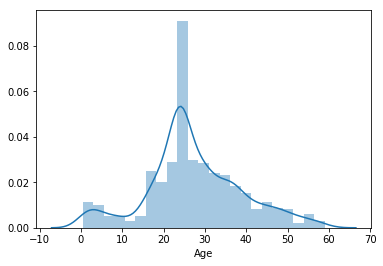

In [44]:
#Lets check the distribution of Age
sns.distplot(dfupdated['Age'])

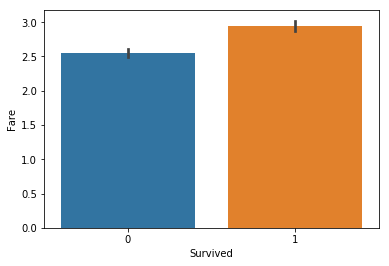

In [45]:
#Lets check the relation of fare with target survived
sns.barplot(x='Survived',y='Fare',data=dfupdated)

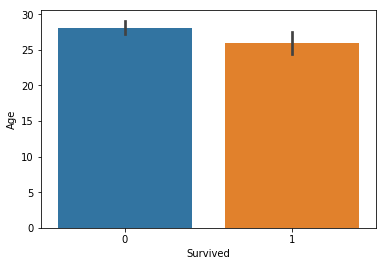

In [46]:
#Lets check the relation of age with target survived
sns.barplot(x='Survived',y='Age',data=dfupdated)

lets explore how target variable is changing with respect to different features

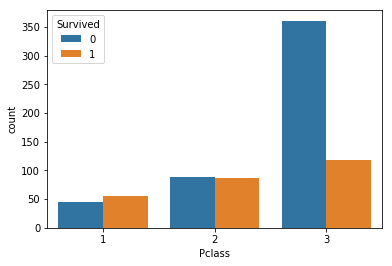

In [47]:
sns.countplot(dfupdated['Pclass'],hue=dfupdated['Survived'])

In [48]:
pd.crosstab(dfupdated['Pclass'],dfupdated['Survived'])

Survived,0,1
Pclass,,
1,45,56
2,89,86
3,361,118


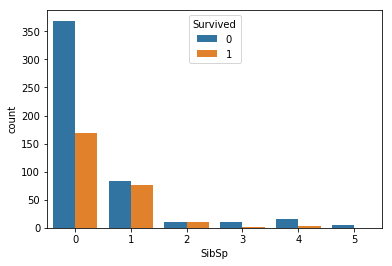

In [49]:
sns.countplot(dfupdated['SibSp'], hue=dfupdated['Survived'])

In [50]:
pd.crosstab(dfupdated['SibSp'],dfupdated['Survived'])

Survived,0,1
SibSp,,
0,369,169
1,84,76
2,11,10
3,11,2
4,15,3
5,5,0


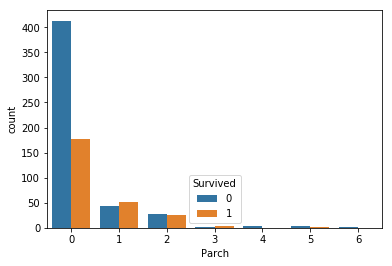

In [51]:
sns.countplot(dfupdated['Parch'], hue=dfupdated['Survived'])

In [52]:
pd.crosstab(dfupdated['Parch'],dfupdated['Survived'])

Survived,0,1
Parch,,
0,413,178
1,44,52
2,28,26
3,2,3
4,3,0
5,4,1
6,1,0


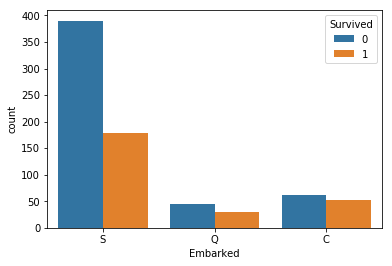

In [53]:
sns.countplot(dfupdated['Embarked'],hue=dfupdated['Survived'])

In [54]:
pd.crosstab(dfupdated['Embarked'],dfupdated['Survived'])

Survived,0,1
Embarked,,
C,61,52
Q,44,29
S,390,179


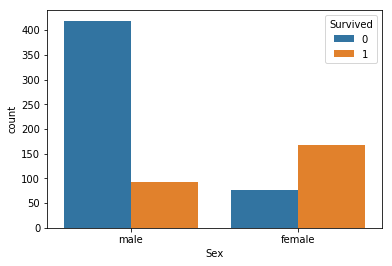

In [55]:
sns.countplot(dfupdated['Sex'],hue=dfupdated['Survived'])

In [56]:
pd.crosstab(dfupdated['Survived'],dfupdated['Embarked'])

Embarked,C,Q,S
Survived,,,
0,61,44,390
1,52,29,179


In [57]:
# As scikit learn only understand only numerics lets do on hot encoding using dummy variables
sex = pd.get_dummies(dfupdated['Sex'],drop_first=True)
embark = pd.get_dummies(dfupdated['Embarked'],drop_first=True)
pclass=pd.get_dummies(dfupdated['Pclass'],drop_first=True)

In [58]:
# As new dummy variables have been created for mentioned variables we dont need them
dfupdated.drop(['Sex','Embarked','Pclass'],axis=1,inplace=True)

In [59]:
#Lets create final dataframe
finaldf = pd.concat([dfupdated,sex,embark,pclass],axis=1)

In [60]:
finaldf.head(20)

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,2.110213,1,0,1,0,1
2,1,26.0,0,0,2.188856,0,0,1,0,1
3,1,35.0,1,0,3.990834,0,0,1,0,0
4,0,35.0,0,0,2.202765,1,0,1,0,1
5,0,24.0,0,0,2.246893,1,1,0,0,1
6,0,54.0,0,0,3.967694,1,0,1,0,0
7,0,2.0,3,1,3.094446,1,0,1,0,1
8,1,27.0,0,2,2.495954,0,0,1,0,1
9,1,14.0,1,0,3.436268,0,0,0,1,0
10,1,4.0,1,1,2.873565,0,0,1,0,1


In [61]:
# seperate features and target
x1=finaldf.drop(['Survived'],axis=1)
y=finaldf['Survived']
x1.head()

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,22.0,1,0,2.110213,1,0,1,0,1
2,26.0,0,0,2.188856,0,0,1,0,1
3,35.0,1,0,3.990834,0,0,1,0,0
4,35.0,0,0,2.202765,1,0,1,0,1
5,24.0,0,0,2.246893,1,1,0,0,1


In [62]:
# lETS DO SCALING
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x1)
x=pd.DataFrame(x,columns=x1.columns)

In [63]:
x.head(10)

,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,-0.462615,0.608175,-0.437466,-0.812621,0.688919,-0.327167,0.571742,-0.549294,0.759079
1,-0.117631,-0.492958,-0.437466,-0.702279,-1.451549,-0.327167,0.571742,-0.549294,0.759079
2,0.658582,0.608175,-0.437466,1.826010,-1.451549,-0.327167,0.571742,-0.549294,-1.317387
3,0.658582,-0.492958,-0.437466,-0.682765,0.688919,-0.327167,0.571742,-0.549294,0.759079
4,-0.290123,-0.492958,-0.437466,-0.620851,0.688919,3.056545,-1.749040,-0.549294,0.759079
5,2.297254,-0.492958,-0.437466,1.793543,0.688919,-0.327167,0.571742,-0.549294,-1.317387
6,-2.187533,2.810442,0.823170,0.568320,0.688919,-0.327167,0.571742,-0.549294,0.759079
7,-0.031386,-0.492958,2.083806,-0.271402,-1.451549,-0.327167,0.571742,-0.549294,0.759079
8,-1.152582,0.608175,-0.437466,1.047919,-1.451549,-0.327167,-1.749040,1.820518,-1.317387
9,-2.015042,0.608175,0.823170,0.258410,-1.451549,-0.327167,0.571742,-0.549294,0.759079


In [64]:
# Let us import required models and metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

In [65]:
# lETS CREATE LIST OF MODELS TO BE EVALUATED
models = []
models.append(('SV',SVC()))
models.append(('GNB',GaussianNB()))
models.append(('DT',DecisionTreeClassifier()))
models.append(('KN',KNeighborsClassifier()))
models.append(('LR',LogisticRegression()))
models.append(('RF',RandomForestClassifier(random_state=10)))


In [66]:
#Let us check which model will perform well on the given data on the basis of mean crossval score and its std dev
results = []
names = []
for name,model in models:
    crossval = cross_val_score(model,x,y,cv=5,scoring='accuracy')
    results.append(crossval)
    names.append(name)
    msg = "%s: %f (%f)" % (name, crossval.mean(),crossval.std())
    print(msg)

SV: 0.817219 (0.014265)
GNB: 0.740397 (0.064126)
DT: 0.780132 (0.027593)
KN: 0.802649 (0.030319)
LR: 0.788079 (0.015102)
RF: 0.801325 (0.021764)


In [67]:
#SVM IS PERFORMING BEST SO LETS USE IT AND FIND BEST RANDOM STATE FOR SAME
sv=SVC()
max_accuracy=0
for i in range(10,100):
    X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=i)
    sv.fit(X_train,y_train)
    ypred=sv.predict(X_test)
    accuracy=accuracy_score(y_test, ypred)
    print('At random state ', i, 'the value of accuracy is ', accuracy)
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        finalstate=i
print()
print()
print('max accuracy is', max_accuracy,'at random state' , finalstate)
    

At random state  10 the value of accuracy is  0.8211920529801324
At random state  11 the value of accuracy is  0.8410596026490066
At random state  12 the value of accuracy is  0.8410596026490066
At random state  13 the value of accuracy is  0.8344370860927153
At random state  14 the value of accuracy is  0.8145695364238411
At random state  15 the value of accuracy is  0.8344370860927153
At random state  16 the value of accuracy is  0.847682119205298
At random state  17 the value of accuracy is  0.8675496688741722
At random state  18 the value of accuracy is  0.8211920529801324
At random state  19 the value of accuracy is  0.8013245033112583
At random state  20 the value of accuracy is  0.8013245033112583
At random state  21 the value of accuracy is  0.7947019867549668
At random state  22 the value of accuracy is  0.7748344370860927
At random state  23 the value of accuracy is  0.8543046357615894
At random state  24 the value of accuracy is  0.8344370860927153
At random state  25 the va

In [68]:
# Lets try to find best parameters if they can improve the accuracy
from sklearn.model_selection import GridSearchCV
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values,kernel=kernel_values)
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10,n_jobs=-1)
grid_result = grid.fit(x, y)

In [69]:
grid.best_score_  # maximum cross val score achievable with these parameters and data

0.8251655629139073

In [70]:
grid.best_estimator_


SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [71]:
#Lets build the model using the parameters and best random state
X_train, X_test, y_train,y_test = train_test_split(x,y,test_size =0.2, random_state = 55)
svm = SVC(C=0.7, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy   # accuracy is same as with default parameters so this is the final model

0.8741721854304636

In [72]:
#Lets see the confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report
print('confusion matrix = ',confusion_matrix(y_test,y_pred))


confusion matrix =  [[96  6]
 [13 36]]


In [73]:
print('classification report = ',classification_report(y_test,y_pred))

classification report =                precision    recall  f1-score   support

           0       0.88      0.94      0.91       102
           1       0.86      0.73      0.79        49

   micro avg       0.87      0.87      0.87       151
   macro avg       0.87      0.84      0.85       151
weighted avg       0.87      0.87      0.87       151



In [74]:
# Lets dump our model into pkl pile
from sklearn.externals import joblib
joblib.dump(svm,'SVM_TITAN.pkl')

['SVM_TITAN.pkl']